<h1 style="text-align: center;"><strong><em>Solución de los Ejercicios</em></strong></h1>
<h2 style="text-align: center;"><em>Simulación del Sistema cuántico descrito en la sección 4.1</em></h2>

<h3>El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.</h3>

<h4>1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.</h4>

Verificar si el vector ket esta normalizado
    $$\| \vec{v} \| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = 1$$
    si esto no ocurre tendremos que dividir cada uno de los componentes del vector por la norma
    $$\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}$$

Para obtener la probabilidad usaremos la siguiente formula (El vector debe estar normalizado):
$$ P(X_i)= |C_i|^2$$
$$\textit{Donde $C_i$ es el valor en la posición especificada del vector Ket.}$$

#### $$ Ejemplo $$

$$ v = 
\begin{bmatrix}
2 - i \\
2i \\
1 - i \\
1 \\
-2i \\
2
\end{bmatrix}
$$


Primero, calculamos la norma del vector $\| v \|$:

$$
\| v \| = \sqrt{2^2+(-1)^2+2^2 + 1^2 + (-1)^2+ 1^2 + (-2)^2 +2^2}
$$

Esto se simplifica a:

$$
\| v \| = \sqrt{4 + 1 + 4 + 1 + 1 + 1 + 4 + 4} = \sqrt{20}
$$

Ahora, normalizamos el vector dividiendo cada componente por $\| v \|$:

$$
\hat{v} = \frac{v}{\| v \|} = \frac{1}{\sqrt{20}} \begin{bmatrix}
2 - i \\
2i \\
1 - i \\
1 \\
-2i \\
2
\end{bmatrix}
$$

El vector normalizado es:

$$
\hat{v} = 
\begin{bmatrix}
\frac{2 - i}{\sqrt{20}} \\
\frac{2i}{\sqrt{20}} \\
\frac{1 - i}{\sqrt{20}} \\
\frac{1}{\sqrt{20}} \\
\frac{-2i}{\sqrt{20}} \\
\frac{2}{\sqrt{20}}
\end{bmatrix}
$$

Calcularemos la probabilidad de que se encuentre en la posición 1 (El proceso es el mismo para las otra posiciones)
$$ P(X_1)= |2i|^2$$
$$ P(X_1)= \left( \sqrt{(\frac{2}{\sqrt{20}})^2} \right)^2 $$
$$ P(X_1)= \left( \sqrt{\frac{4}{20}} \right)^2 $$
$$ P(X_1)=  \frac{4}{20} = \frac{1}{5} = 0.2 $$




In [126]:
import numpy as np

def normalize_vector(v):
    norm = np.linalg.norm(v)
    if(norm == 1):
        return v
    else:
        v = v / norm
    return v

def probability_in_Xposition(X,v):
    v = normalize_vector(v)
    Px = np.abs(v[X][0]) ** 2
    return  Px

v = np.array([[2-1j],[2j],[1-1j],[1],[-2j],[2]])

print(probability_in_Xposition(0,v))
print(probability_in_Xposition(1,v))
print(probability_in_Xposition(2,v))
print(probability_in_Xposition(3,v))
print(probability_in_Xposition(4,v))
print(probability_in_Xposition(5,v))

0.25
0.19999999999999998
0.1
0.049999999999999996
0.19999999999999998
0.19999999999999998


<h4>2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.</h4>

Pasos para calcular la probabilidad de transición:

1. Verificar que los dos vectores esten normalizados

    $$\| \vec{v} \| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = 1$$
    $$\| \vec{w} \| = \sqrt{w_1^2 + w_2^2 + \dots + w_n^2} = 1$$
    si esto no ocurre tendremos que dividir cada uno de los componentes del vector por la norma
    $$\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}$$
    $$\hat{w} = \frac{\vec{w}}{\|\vec{w}\|}$$

2. Calcular la amplitud 
$$ \langle w | v \rangle = | w \rangle^+ * | v \rangle = \begin{bmatrix}
\overline{w_0} & \overline{w_1} & \overline{w_2} & \dots & \overline{w_n}
\end{bmatrix} * \begin{bmatrix}
v_0 \\
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix} $$

3. Calcular la probabilidad de transición, que se utiliza la siguiente fórmula:
    $$ P(w)= |\langle w | v \rangle |^2$$



In [127]:

import numpy as np

def format_complex(c):
    if (c.imag == 1 or c.imag == -1):
        if(c.real == 0):
            return f"{'       '}i{'   '}" 
        else:
            return f"{c.real}{' + ' if c.imag >= 0 else ' - '}i{'   '}"
    if (c.imag == 0):
        return f"{'' if c.real < 0 else ' '}{c.real}{'       '}"
    elif(c.real == 0):
        if (c.imag < 0):
            return f"{'      '}{c.imag}i"
        else:
            return f"{'        '}{c.imag}i"
    return f"{'' if c.real < 0 else ' '}{c.real}{' + ' if c.imag >= 0 else ' - '}{abs(c.imag)}i"

def format_printedE2(a,b,c):
    print("La probabilidad de transición de")
    m = 0
    for i in a:
        if (m > 0):
            m += 1
            print("     ", '  '.join(format_complex(x) for x in i) )
        else:
            m += 1
            print(" v = ", '  '.join(format_complex(x) for x in i))
    print()
    m = 0
    for i in b:
        if (m > 0):
            m += 1
            print ("     ", '  '.join(format_complex(x) for x in i) )
        else:
            m += 1
            print(" w = ", '  '.join(format_complex(x) for x in i))
    print()
    print(" es: ", c)
    

def normalize_vector(v):
    norm = np.linalg.norm(v)
    if(norm == 1):
        return v
    else:
        v = v / norm
    return v

def bra_vector(v):
    bra = np.conjugate(v.T)
    return bra

def amplitude_transition(w, v):     
    amplitude = np.dot(w,v)
    return amplitude


def probabilidad_transicion(v, w):
    if (v.shape == w.shape):
        #Paso 1 --> Normalizar vectores
        v_n = normalize_vector(v)
        w_n = normalize_vector(w)
        
        #Paso 2 --> Calcular el Bra del vector de destino
        braW = bra_vector(w_n)

        #Paso 3 --> Calculo la amplitud de transicion de los vectores
        amplitudeTransition = amplitude_transition(braW,v_n)

        #Paso 4 --> Calcular la probabilidad
        probability = np.abs(amplitudeTransition) ** 2
        return probability[0][0]
    else:
        return "Vectores de diferente tamaño, no se puede calcular la transición"

print("Ejemplo 1")
v = np.array([[ 2 + 1j], [-1 + 2j], [1j], [1],[3 - 1j],[2],[-2j],[-2 + 1j],[1 - 3j],[ -1j ]])
w = np.array([[-1 - 4j], [2 - 3j], [-7 + 6j], [-1 + 1j], [-5 -3j], [5], [5 + 8j], [4 -4j], [8 - 7j], [2 - 7j]])  

probabilidad = probabilidad_transicion(v,w )
format_printedE2(v,w,probabilidad)


Ejemplo 1
La probabilidad de transición de
 v =  2.0 + i   
      -1.0 + 2.0i
             i   
       1.0       
      3.0 - i   
       2.0       
            -2.0i
      -2.0 + i   
       1.0 - 3.0i
             i   

 w =  -1.0 - 4.0i
       2.0 - 3.0i
      -7.0 + 6.0i
      -1.0 + i   
      -5.0 - 3.0i
       5.0       
       5.0 + 8.0i
       4.0 - 4.0i
       8.0 - 7.0i
       2.0 - 7.0i

 es:  0.017372523241618944


In [128]:
print("Ejemplo 2")
v = np.array([[ 2 + 1j]])
w = np.array([[-1 - 4j], [2 - 3j]])  

probabilidad = probabilidad_transicion(v,w )
format_printedE2(v,w,probabilidad)


Ejemplo 2
La probabilidad de transición de
 v =  2.0 + i   

 w =  -1.0 - 4.0i
       2.0 - 3.0i

 es:  Vectores de diferente tamaño, no se puede calcular la transición


<h2 style="text-align: center;"><em>Complete los retos de programación del capítulo 4</em></h2>

<h3>1. Amplitud de transición.</h3><h4> El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación</h4>

Pasos para calcular la probabilidad de transición:

1. Verificar que los dos vectores esten normalizados

    $$\| \vec{v} \| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = 1$$
    $$\| \vec{w} \| = \sqrt{w_1^2 + w_2^2 + \dots + w_n^2} = 1$$
    si esto no ocurre tendremos que dividir cada uno de los componentes del vector por la norma
    $$\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}$$
    $$\hat{w} = \frac{\vec{w}}{\|\vec{w}\|}$$

2. Calcular la amplitud 
$$ \langle w | v \rangle = | w \rangle^+ * | v \rangle = \begin{bmatrix}
\overline{w_0} & \overline{w_1} & \overline{w_2} & \dots & \overline{w_n}
\end{bmatrix} * \begin{bmatrix}
v_0 \\
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix} $$

3. Calcular la probabilidad de transición, que se utiliza la siguiente fórmula:
    $$ P(w)= |\langle w | v \rangle |^2$$

In [129]:

import numpy as np

def format_complex(c):
    if (c.imag == 1 or c.imag == -1):
        if(c.real == 0):
            return f"{'       '}i{'   '}" 
        else:
            return f"{c.real}{' + ' if c.imag >= 0 else ' - '}i{'   '}"
    if (c.imag == 0):
        return f"{'' if c.real < 0 else ' '}{c.real}{'       '}"
    elif(c.real == 0):
        if (c.imag < 0):
            return f"{'      '}{c.imag}i"
        else:
            return f"{'        '}{c.imag}i"
    return f"{'' if c.real < 0 else ' '}{c.real}{' + ' if c.imag >= 0 else ' - '}{abs(c.imag)}i"

def format_printed1(a,b,c):
    print("La probabilidad de transición de")
    m = 0
    for i in a:
        if (m > 0):
            m += 1
            print("     ", '  '.join(format_complex(x) for x in i) )
        else:
            m += 1
            print(" v = ", '  '.join(format_complex(x) for x in i))
    print()
    m = 0
    for i in b:
        if (m > 0):
            m += 1
            print ("     ", '  '.join(format_complex(x) for x in i) )
        else:
            m += 1
            print(" w = ", '  '.join(format_complex(x) for x in i))
    print()
    print(" es: ", c)
    

def normalize_vector(v):
    norm = np.linalg.norm(v)
    if(norm == 1):
        
        return v
    else:
        v = v / norm
    return v

def bra_vector(v):
    bra = np.conjugate(v.T)
    return bra

def amplitude_transition(w, v):
    amplitude = np.dot(w,v)
    return amplitude

def probabilidad_transicion(v, w):
    if (v.shape == w.shape):
        #Paso 1 --> Normalizar vectores
        v_n = normalize_vector(v)
        w_n = normalize_vector(w)
        
        #Paso 2 --> Calcular el Bra del vector de destino
        braW = bra_vector(w_n)

        #Paso 3 --> Calculo la amplitud de transicion de los vectores
        amplitudeTransition = amplitude_transition(braW,v_n)

        #Paso 4 --> Calcular la probabilidad
        probability = np.abs(amplitudeTransition) ** 2
        return probability[0][0]
    else:
        return "Vectores de diferente tamaño, no se puede calcular la transición"



v = np.array([[3 + 2j], [-2 + 3j], [1 - 1j], [2], [-5 + 5j], [1j], [-3 - 2j], [4 + 3j], [5]])
w = np.array([[2 - 1j], [-5 - 2j], [3 + 4j], [-2 + 3j], [1 - 1j], [6j], [5 + 7j], [8 - 5j], [7]])
probabilidad = probabilidad_transicion(v,w)
format_printed1(v,w,probabilidad)

v = np.array([[3 + 2j], [4 + 3j]])
w = np.array([[2 - 1j]])
probabilidad = probabilidad_transicion(v,w)
format_printed1(v,w,probabilidad)



La probabilidad de transición de
 v =   3.0 + 2.0i
      -2.0 + 3.0i
      1.0 - i   
       2.0       
      -5.0 + 5.0i
             i   
      -3.0 - 2.0i
       4.0 + 3.0i
       5.0       

 w =  2.0 - i   
      -5.0 - 2.0i
       3.0 + 4.0i
      -2.0 + 3.0i
      1.0 - i   
              6.0i
       5.0 + 7.0i
       8.0 - 5.0i
       7.0       

 es:  0.02943929209563516
La probabilidad de transición de
 v =   3.0 + 2.0i
       4.0 + 3.0i

 w =  2.0 - i   

 es:  Vectores de diferente tamaño, no se puede calcular la transición


<h3> 2. Valor esperado y varianza </h3> <h4>Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.</h4>

### Pasos para hallar el valor esperado y la varianza:

1. Verificar si el observable es hermitiano
    $$ \Omega = \Omega^+ $$
##### Si es hermitiano continuamos con el paso 2, de lo contrario no podremos calcular la media y varianza
2. Verificar si el vector ket esta normalizado
    $$\| \vec{v} \| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = 1$$
    si esto no ocurre tendremos que dividir cada uno de los componentes del vector por la norma
    $$\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}$$

3. Calcularemos la media o valor esperado con la siguiente formula:
$$ \langle\Omega \rangle_\Psi = \langle\Omega \Psi, \Psi \rangle$$
$$\textit{Donde \( \Omega \) es el observable, \( \Psi \) es el vector ket y \( \Omega \Psi \) es la acción del observable sobre el vector ket.}$$

4. Con la media usaremos la siguiente fórmula que nos dara uno de los valores que estaremos usando para clacular la varianza

$$ \Delta_\Psi(\Omega) = \Omega - \langle\Omega \rangle_\Psi * I$$
$$\textit{Donde I es la matriz identidad de las misma dimensiones del observable}$$
$$ X = \Delta_\Psi(\Omega) * \Delta_\Psi(\Omega) $$

$$\textit{Donde X será una matriz de las misma dimensiones del observable}$$

$$ Var_\Psi(\Omega) = \langle X \Psi, \Psi \rangle






In [130]:
import numpy as np
import math

def normalize_vector(v):
    norm = np.linalg.norm(v)
    if(norm == 1):
        return v
    else:
        v = v / norm
    return v

def expected_value(M,s):
    Ms = np.dot(M,s)
    expectedValue = np.vdot(Ms,s)
    return expectedValue

def variance(expectV, M, s):
    I = np.eye(M.shape[0], M.shape[1])
    Iexpect = np.multiply(I, expectV)
    delta = np.subtract(M,Iexpect)
    X = np.dot(delta , delta )
    var = expected_value(X,s)
    return var

def media_varianza(M,s):
    MAdjunt = np.conjugate(M.T)
    if (np.array_equal(M,MAdjunt)):
        s = normalize_vector(s)
        expectV = expected_value(M,s)
        variance_S = variance(expectV, M, s)
    else:
        return "La matriz no es hermitiana"
    return f'El valor esperado es: {expectV} y la varianza es: {variance_S:.2f}'

M=  np.array([[3,1+2j],[1-2j,-1]])
s =  np.array([[math.sqrt(2)/2],[(math.sqrt(2)/2)*-1]])

print(media_varianza(M,s))

M= np.array([[1, 2], [2, 1]])
s = np.array([[1], [0]])

print(media_varianza(M,s))

M = np.array([[1, 10], [4, 4]])
s = np.array([[1], [1]])
print(media_varianza(M,s))

El valor esperado es: 0j y la varianza es: 8.00+0.00j
El valor esperado es: 1 y la varianza es: 4.00
La matriz no es hermitiana


<h3>3. Probabilidad de transición a los vectores propios</h3> 
<h4>El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.</h4>

Pasos:

1. Hallar los valores y vectores propios del observable

2. Normalizar el estado inicial y los vectores propios.
    $$\| \vec{v} \| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} = 1$$
    si esto no ocurre tendremos que dividir cada uno de los componentes del vector por la norma
    $$\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}$$

3. Calcularemos la amplitud de transición del estado inicial a cada uno de los vectores propios.
$$ \langle e_n | \Psi \rangle = | e_n \rangle^+ * | \Psi \rangle = \begin{bmatrix}
\overline{e_0} & \overline{e_1} & \overline{e_2} & \dots & \overline{e_n}
\end{bmatrix} * \begin{bmatrix}
\Psi _0 \\
\Psi _1 \\
\Psi _2 \\
\vdots \\
\Psi _n
\end{bmatrix} $$

4. Calcular la probabilidad de transición, que se utiliza la siguiente fórmula:
    $$ P(e_n)= |\langle e_n | \Psi \rangle |^2$$

5. Multiplicamos cada una de las probabilidades con su respectivo valor propio y la sumatoria sera la probabilidad de que transite a alguno de los vectores propios después de la observación.




In [131]:
import numpy as np

def format_complex(c):
    if (c.imag == 1 or c.imag == -1):
        if(c.real == 0):
            return f"{'       '}i{'   '}" 
        else:
            return f"{c.real}{' + ' if c.imag >= 0 else ' - '}i{'   '}"
    if (c.imag == 0):
        return f"{'' if c.real < 0 else ' '}{c.real}{'       '}"
    elif(c.real == 0):
        if (c.imag < 0):
            return f"{'      '}{c.imag}i"
        else:
            return f"{'        '}{c.imag}i"
    return f"{'' if c.real < 0 else ' '}{c.real}{' + ' if c.imag >= 0 else ' - '}{abs(c.imag)}i"

def format_printed3(a,b,c,s):
    print("La probabilidad de transición de")
    m = 0
    for i in a:
        if (m > 0):
            m += 1
            print("       ", '  '.join(format_complex(i) ) )
        else:
            m += 1
            print(" ket = ", '  '.join(format_complex(i) ))
    print("a ")
    m = 0
    for i in b:
        if (m > 0):
            m += 1
            print("               ", '  '.join(format_complex(i) ) )
        else:
            m += 1
            print(f"VectorPropio{s+1} =", '  '.join(format_complex(i)))
    print()
    print(" es: ", c)
    
def normalize_vector(v):
    norm = np.linalg.norm(v)
    if(norm == 1):
        return v
    else:
        v = v / norm
    return v


def probabilidad_transicion(v, w):
    #Paso 1 --> Normalizar vectores
    w_n = normalize_vector(w)
    #Paso 2 --> Calculo la amplitud de transicion de los vectores
    amplitudeTransition = np.vdot(w_n,v)
    #Paso 3 --> Calcular la probabilidad
    probability = np.abs(amplitudeTransition) ** 2
    return probability

def eigenvalues_and_Eigenvectors(a):
    eigenvalues, eigenvectors = np.linalg.eig(a)
    return eigenvalues,eigenvectors

def observable(M,s):
    MAdjunt = np.conjugate(M.T)
    if (np.array_equal(M,MAdjunt)):
        probabilidad_total = 0
        s = normalize_vector(s)
        eigenvalues, eigenvectors = eigenvalues_and_Eigenvectors(M)
        for i in range(len(eigenvectors)):
            probabilidad = probabilidad_transicion(s, eigenvectors[i])
            format_printed3(s,eigenvectors[i],probabilidad,i)  
            print()
            probabilidad_total +=  probabilidad * eigenvalues[i]
        print("la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación es de",probabilidad_total)
    else:
        return "La matriz no es hermitiana"
    


M= np.array([[0, 1], [1, 0]])
s = np.array([[1], [0]])

observable(M,s) 


La probabilidad de transición de
 ket =     [  1  ]                     
           [  0  ]                     
a 
VectorPropio1 =    0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     
                -  0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     

 es:  0.5000000000000001

La probabilidad de transición de
 ket =     [  1  ]                     
           [  0  ]                     
a 
VectorPropio2 =    0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     
                   0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     

 es:  0.5000000000000001

la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación es de 0.0


<h3>4. Dinámica de sistemas </h3> 
<h4> Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial. </h4>

La ecuación para poder calcular el estado final es:
$$
|\phi\rangle = U_{n-1} * U_{n-2} * ... * (U_2(U_1(U_0 |\Psi\rangle)))
$$

In [132]:
import numpy as np
import math

def format_complex(c):
    if (c.imag == 1 or c.imag == -1):
        if(c.real == 0):
            return f"{'       '}i{'   '}" 
        else:
            return f"{c.real}{' + ' if c.imag >= 0 else ' - '}i{'   '}"
    if (c.imag == 0):
        return f"{'' if c.real < 0 else ' '}{c.real}{'       '}"
    elif(c.real == 0):
        if (c.imag < 0):
            return f"{'      '}{c.imag}i"
        else:
            return f"{'        '}{c.imag}i"
    return f"{'' if c.real < 0 else ' '}{c.real}{' + ' if c.imag >= 0 else ' - '}{abs(c.imag)}i"

def format_printed4(a):
    m = 0
    for i in a:
        if (m > 0):
            m += 1
            print("      ", '  '.join(format_complex(x) for x in i) )
        else:
            m += 1
            print("|ϕ〉= ", '  '.join(format_complex(x) for x in i))

def isUnitary(M):
    product = np.dot(M.conjugate().T, M)
    return np.allclose(product, np.eye(M.shape[0]))
    
def state_actually(Matrix, ket):
    return np.dot(Matrix,ket)

def state_Final(Matrices,ket):
    dimension = Matrices[0].shape
    printed_final = "|Ψ〉"
    for i in range (len(Matrices)):
        if (isUnitary(Matrices[i]) == False or dimension != Matrices[i].shape):
            return "Una de las matrices del sistema no es unitaria"
        else:
            ket = state_actually(Matrices[i], ket)
            printed_final = f"(U{i}" + printed_final + ")"
    printed_final = "|ϕ〉= "+ printed_final 
    return printed_final, ket

def dinamic_system(Matrices,ket):
    ket_Final = state_Final(Matrices,ket)
    if (ket_Final == "Una de las matrices del sistema no es unitaria"):
        print("Una de las matrices del sistema no es unitaria")
    else:
        printed_final, ket_final = ket_Final[0], ket_Final[1]
        print(printed_final)
        format_printed4(ket_final)
    
#Ejemplo de matrices unitarias

Y1 = np.array([[0, 1], [1, 0]])
Y2 = np.array([[0, -1j], [1j, 0]])
Y3 = np.array([[1, 0], [0, -1]])

ket = np.array([[1 / math.sqrt(2)],[1 / math.sqrt(2)]])

try:
    Matrices = np.array([Y1, Y2, Y3])
    dinamic_system(Matrices,ket)
except ValueError as e:
    print("Las matrices tienen dimensiones incompatibles y no se pueden usar para formar la dinamica del sistema")

#Ejemplo con al menos una matriz no unitaria

Y1 = np.array([[0, 4], [1, 0]])
Y2 = np.array([[0, -1j], [1j, 0]])
Y3 = np.array([[1, 0], [0, -1]])

ket = np.array([[1 / math.sqrt(2)],[1 / math.sqrt(2)]])

try:
    Matrices = np.array([Y1, Y2, Y3])
    dinamic_system(Matrices,ket)

except ValueError as e:
    print("Las matrices tienen dimensiones incompatibles y no se pueden usar para formar la dinamica del sistema")

#Ejemplo de matrices unitarias

Y1 = np.array([[0, 1,2], [1, 0,2]])
Y2 = np.array([[0, -1j], [1j, 0]])
Y3 = np.array([[1, 0], [0, -1]])

ket = np.array([[1 / math.sqrt(2)],[1 / math.sqrt(2)]])
try:
    Matrices = np.array([Y1, Y2, Y3])
    print(state_Final(Matrices,ket))

except ValueError as e:
    print("Las matrices tienen dimensiones incompatibles y no se pueden usar para formar la dinamica del sistema")



|ϕ〉= (U2(U1(U0|Ψ〉)))
|ϕ〉=        -0.7071067811865475i
             -0.7071067811865475i
Una de las matrices del sistema no es unitaria
Las matrices tienen dimensiones incompatibles y no se pueden usar para formar la dinamica del sistema


<h2 style="text-align: center;"><em>Ejemplos de la sección 4.3 y 4.4</em></h2>



## Para los ejercicios 4.3.1 y 4.3.2

#### Estaremos usando de referencia el ejercicio 4.2.2 que es:

Consideremos una partícula con un espín inicial hacia arriba. Apliquemos $ \S_x \ $ a ella y determinemos la probabilidad de que el estado resultante siga siendo de espín hacia arriba.
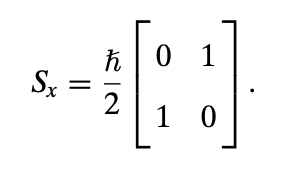

### Exercise 4.3.1

Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

Para este ejercicio lo que haremos sera encontrar los vectores propios de la matriz, para esto usaremos la función __eigenvalues_and_Eigenvectors(M)__ que definimos en el tercer reto de programación.


In [133]:
def format_printed_exercise431( eigenvectors,a):
    print("Los v vectores propios de la matriz ")
    m = 0
    for i in a:
        if (m > 0):
            m += 1
            print ("     ", ' '.join(format_complex(x) for x in i) )
        else:
            m += 1
            print(" a = ", ' '.join(format_complex(x) for x in i))
    print() 
    print("vectores propios:")
    for i, col in enumerate(eigenvectors.T):
        print(f"VectorPropio{i+1}:")
        for value in col:
            print("   ",(value))
        print() 

s_x = np.array([[0, 1], [1, 0]])
eigenvectors_exercise431 = eigenvalues_and_Eigenvectors(s_x)[1]
format_printed_exercise431(eigenvectors,s_x)

Los v vectores propios de la matriz 
 a =   0         1       
       1         0       

vectores propios:
VectorPropio1:
    0.7071067811865475
    0.7071067811865475

VectorPropio2:
    -0.7071067811865475
    0.7071067811865475



### Exercise 4.3.2

Perform the same calculations as in the last example, using Exer- cise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previ- ous example.

Pasos para dar solución al ejercicio:

1. Calcular los valores propios de la matriz
2. Calcular la probabilidad de transición a los vectores propios
3. Multiplicaremos las probabilidades por su correspondiente valor propio y las sumaremos.

Todo esto lo haremos con la función __observable(M,s)__ del tercer reto de programación.

In [134]:
#Spin Up
y = np.array([[1],[0]])
s_x = np.array([[0, 1], [1, 0]])
observable(s_x,y)

La probabilidad de transición de
 ket =     [  1  ]                     
           [  0  ]                     
a 
VectorPropio1 =    0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     
                -  0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     

 es:  0.5000000000000001

La probabilidad de transición de
 ket =     [  1  ]                     
           [  0  ]                     
a 
VectorPropio2 =    0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     
                   0  .  7  0  7  1  0  6  7  8  1  1  8  6  5  4  7  5                     

 es:  0.5000000000000001

la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación es de 0.0


### Exercise 4.4.1

Verify that

$$ U_{1} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  and \quad U_{2} = \begin{bmatrix} \frac{\sqrt{2}}{2}\ & \frac{\sqrt{2}}{2}\ \\ \frac{\sqrt{2}}{2}\ & -\frac{\sqrt{2}}{2}\ \end{bmatrix} $$

are unitary matrices. Multiply them and verify that their product is also unitary.

Para verificar si efectivamente son unitarias estaremos usando la función __isUnitary(M)__ que definimos en el reto de programación 4.




In [135]:

def format_printedMatrix(a, T):
    if T == 1:
        m = 0
        for i in a:
            if (m > 0):
                m += 1
                print("               ", '  '.join(format_complex(x) for x in i) )
            else:
                m += 1
                print("", '  '.join(format_complex(x) for x in i))
    else:
        m = 0
        for i in a:
            if (m > 0):
                m += 1
                print("                         ", '  '.join(format_complex(x) for x in i) )
            else:
                m += 1
                print("", '  '.join(format_complex(x) for x in i))


def verificar(U1,U2):
    u = np.array([U1,U2])
    for i in range (len(u)):
        print(f'La matriz U{i+1} = ',end="")
        format_printedMatrix(u[i],1)
        if (isUnitary(u[i]) == True):
            print("es unitaria")
        else:
            print("no es unitaria")
    producto = np.dot(U1, U2)
    
    print("El producto de U1 * U2 = ",end="")
    format_printedMatrix(producto,2)
    if (isUnitary(producto) == True):
        print("es unitario")
    else:
        print("no es unitario")

U1 = np.array([[0, 1], [1, 0]])
v = (math.sqrt(2)) / 2
U2 = np.array([[v, v], [v, -v]])
verificar(U1,U2)
 

La matriz U1 =   0.0          1.0       
                 1.0          0.0       
es unitaria
La matriz U2 =   0.7071067811865476          0.7071067811865476       
                 0.7071067811865476         -0.7071067811865476       
es unitaria
El producto de U1 * U2 =   0.7071067811865476         -0.7071067811865476       
                           0.7071067811865476          0.7071067811865476       
es unitario


### Exercise 4.4.2

Go back to Example 3.3.2 (quantum billiard ball), keep the same 
initial state vector[1, 0, 0, 0]<sup>T</sup>
but change the unitary map to


$$
\begin{bmatrix}
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0
\end{bmatrix}
$$

Determine the state of the system after three time steps. What is the chance of 
the quantum ball to be found at point 3?
$$ MX = X' = 
    \begin{bmatrix} \\
                    0 & \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} & 0 \\
                    \\
                    \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
                    \\
                    \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
                    \\
                    0 &\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0 \\
                
                    \\
    \end{bmatrix}·
    \begin{bmatrix} \\
                    1 \\
                    \\
                    0 \\
                    \\
                    0 \\
                    \\
                    0 \\ 
                    \\        
    \end{bmatrix}

$$
$$ MMX = X'' = 
    \begin{bmatrix} \\
                    0 & \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} & 0 \\
                    \\
                    \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
                    \\
                    \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
                    \\
                    0 &\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0 \\
                
                    \\
    \end{bmatrix}·\begin{bmatrix} \\
                    0 & \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} & 0 \\
                    \\
                    \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
                    \\
                    \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
                    \\
                    0 &\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0 \\
                
                    \\
    \end{bmatrix}·
    \begin{bmatrix} \\
                    1 \\
                    \\
                    0 \\
                    \\
                    0 \\
                    \\
                    0 \\ 
                    \\        
    \end{bmatrix}
$$
$$ MMMX = X''' = 
\begin{bmatrix} \\
                    0 & \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} & 0 \\
                    \\
                    \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
                    \\
                    \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
                    \\
                    0 &\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0 \\
                
                    \\
    \end{bmatrix}·
    \begin{bmatrix} \\
                    0 & \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} & 0 \\
                    \\
                    \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
                    \\
                    \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
                    \\
                    0 &\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0 \\
                
                    \\
    \end{bmatrix}·\begin{bmatrix} \\
                    0 & \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}} & 0 \\
                    \\
                    \frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
                    \\
                    \frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
                    \\
                    0 &\frac{1}{\sqrt{2}}& -\frac{1}{\sqrt{2}} &0 \\
                
                    \\
    \end{bmatrix}·
    \begin{bmatrix} \\
                    1 \\
                    \\
                    0 \\
                    \\
                    0 \\
                    \\
                    0 \\ 
                    \\        
    \end{bmatrix} = 
    \begin{bmatrix} \\
                    0 \\
                    \\
                    − \frac{1}{\sqrt{2}}+ \frac{j}{\sqrt{2}}\\
                    \\
                    0 \\
                    \\
                    0 \\ 
                    \\        
    \end{bmatrix}
$$

In [136]:
def format_complex(c):
    if (c.imag == 1 or c.imag == -1):
        if(c.real == 0):
            return f"{'       '}i{'   '}" 
        else:
            return f"{c.real}{' + ' if c.imag >= 0 else ' - '}i{'   '}"
    if (c.imag == 0):
        return f"{'' if c.real < 0 else ' '}{c.real}{'       '}"
    elif(c.real == 0):
        if (c.imag < 0):
            return f"{'      '}{c.imag}i"
        else:
            return f"{'        '}{c.imag}i"
    return f"{'' if c.real < 0 else ' '}{c.real}{' + ' if c.imag >= 0 else ' - '}{abs(c.imag)}i"

def state_after_x_click(nClick,d,s):
    matrix = np.linalg.matrix_power(d, nClick)
    state_after_x_click = np.dot(matrix, s)
    return state_after_x_click[2]

dinamic = np.array([ [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
                    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
                    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
                    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]])

state = np.array([[1],[0],[0],[0]])
print("La probabilidad de encontrar la pelota cuántica en el punto 3 es de: ",format_complex(state_after_x_click(3,dinamic,state)[0]))


La probabilidad de encontrar la pelota cuántica en el punto 3 es de:   0.0       
